## Basic libraries

In [2]:
import numpy as np
import pandas as pd

In [3]:
# For visualizations

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Make plots look nicer

In [6]:
plt.style.use("default")
sns.set()

In [7]:
# For machine learning

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [9]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    classification_report
)

In [10]:
# To ignore warnings 

In [11]:
import warnings
warnings.filterwarnings("ignore")

## LOAD THE DATA

In [13]:
# NOTE: The dataset uses ';' as separator, not ','

In [14]:
data = pd.read_csv("bank-full.csv", sep=';')

In [15]:
# Look at the first 5 rows

In [16]:
print("First 5 rows of the dataset:")
display(data.head())

First 5 rows of the dataset:


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [17]:
# Basic info about rows and columns

In [18]:
print("\nShape of the dataset (rows, columns):", data.shape)

print("\nInformation about each column:")
data.info()


Shape of the dataset (rows, columns): (45211, 17)

Information about each column:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


## BASIC DATA UNDERSTANDING

In [21]:
# Check basic statistics for numerical columns

In [22]:
print("Summary statistics for numerical columns:")
display(data.describe())

Summary statistics for numerical columns:


,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [23]:
# Check missing values

In [24]:
print("\nMissing values in each column:")
display(data.isnull().sum())


Missing values in each column:


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [25]:
# Check unique values in target 'y'

In [26]:
print("\nTarget variable 'y' value counts:")
print(data['y'].value_counts())
print("\nTarget variable 'y' proportion (%):")
print(data['y'].value_counts(normalize=True) * 100)


Target variable 'y' value counts:
y
no     39922
yes     5289
Name: count, dtype: int64

Target variable 'y' proportion (%):
y
no     88.30152
yes    11.69848
Name: proportion, dtype: float64


## EXPLORATORY DATA ANALYSIS (EDA)

In [27]:
# Target distribution plot

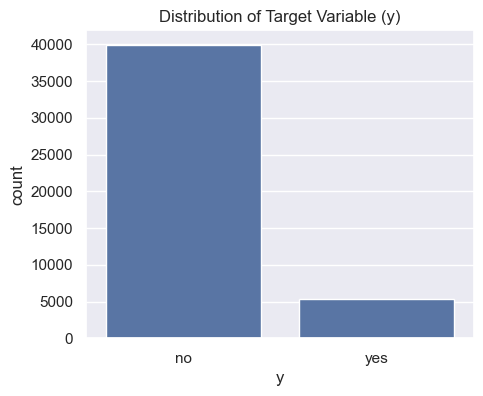

In [28]:
plt.figure(figsize=(5, 4))
sns.countplot(x='y', data=data)
plt.title("Distribution of Target Variable (y)")
plt.show()

In [29]:
# Age distribution

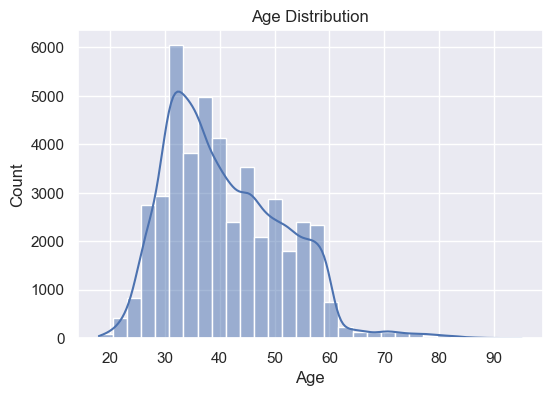

In [30]:
plt.figure(figsize=(6, 4))
sns.histplot(data['age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

In [31]:
# Job type vs subscription rate

Subscription rate (%) by job type:


y,no,yes
job,,
student,71.321962,28.678038
retired,77.208481,22.791519
unemployed,84.497314,15.502686
management,86.244449,13.755551
admin.,87.797331,12.202669
self-employed,88.157061,11.842939
unknown,88.194444,11.805556
technician,88.943004,11.056996
services,91.116996,8.883004


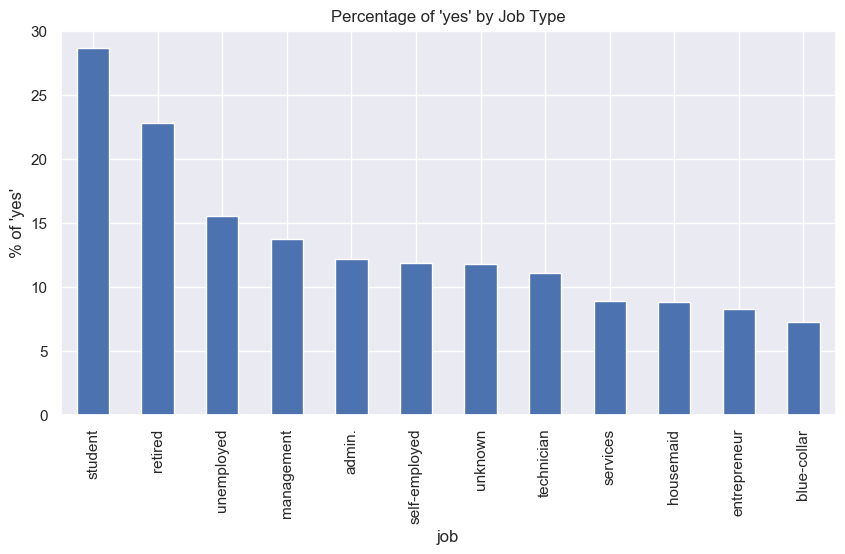

In [32]:
job_y = pd.crosstab(data['job'], data['y'], normalize='index') * 100
print("Subscription rate (%) by job type:")
display(job_y.sort_values(by='yes', ascending=False))

plt.figure(figsize=(10, 5))
job_y['yes'].sort_values(ascending=False).plot(kind='bar')
plt.title("Percentage of 'yes' by Job Type")
plt.ylabel("% of 'yes'")
plt.show()

In [33]:
# Contact month vs subscription rate

Subscription rate (%) by month:


y,no,yes
month,,
mar,48.008386,51.991614
dec,53.271028,46.728972
sep,53.540587,46.459413
oct,56.233062,43.766938
apr,80.320600,19.679400
feb,83.352208,16.647792
aug,88.986714,11.013286
jun,89.777195,10.222805
nov,89.848866,10.151134


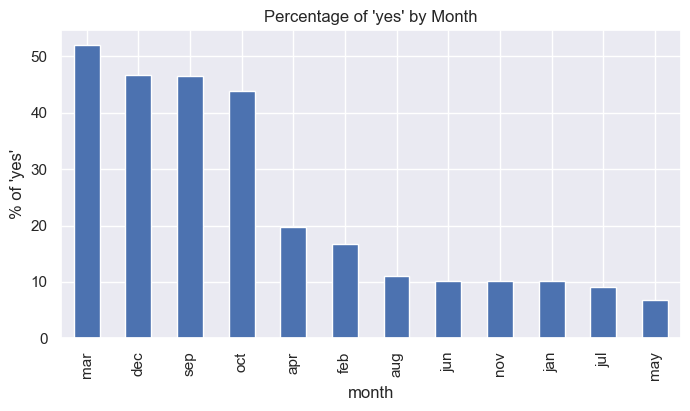

In [34]:
month_y = pd.crosstab(data['month'], data['y'], normalize='index') * 100
print("Subscription rate (%) by month:")
display(month_y.sort_values(by='yes', ascending=False))

plt.figure(figsize=(8, 4))
month_y['yes'].sort_values(ascending=False).plot(kind='bar')
plt.title("Percentage of 'yes' by Month")
plt.ylabel("% of 'yes'")
plt.show()

In [35]:
## NOTE ABOUT 'duration'

In [36]:
# Check how duration relates to target (for understanding only)

In [37]:
print("Call duration statistics grouped by target 'y':")
display(data.groupby('y')['duration'].describe())

Call duration statistics grouped by target 'y':


,count,mean,std,min,25%,50%,75%,max
y,,,,,,,,
no,39922.0,221.182806,207.383237,0.0,95.0,164.0,279.0,4918.0
yes,5289.0,537.294574,392.525262,8.0,244.0,426.0,725.0,3881.0


In [38]:
# IMPORTANT:
# 'duration' is not known before the call.
# It strongly influences 'y' but using it in the model would be unrealistic
# (this is called data leakage).
# We will NOT use 'duration' in the final predictive model.

## DATA PREPROCESSING FOR MODELING

In [39]:
# Separate features (X) and target (y)

In [40]:
X = data.drop('y', axis=1)
y = data['y'].map({'no': 0, 'yes': 1})  # convert target to 0 / 1

In [41]:
# Remove 'duration' to avoid data leakage

In [43]:
if 'duration' in X.columns:
    X = X.drop('duration', axis=1)

print("Features after dropping 'y' and 'duration':")
print(X.columns)

Features after dropping 'y' and 'duration':
Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'campaign', 'pdays', 'previous',
       'poutcome'],
      dtype='object')


In [44]:
# Convert categorical variables to dummy/indicator variable

In [45]:
X_encoded = pd.get_dummies(X, drop_first=True)

print("\nShape before encoding:", X.shape)
print("Shape after one-hot encoding:", X_encoded.shape)


Shape before encoding: (45211, 15)
Shape after one-hot encoding: (45211, 41)


In [46]:
# Train-test split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y  # keeps same proportion of classes in train and test
)

print("\nTraining set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (36168, 41)
Test set shape: (9043, 41)


## BUILD MULTIPLE MODELS

In [48]:
# We will train three models:
# 1) Logistic Regression
# 2) Decision Tree
# 3) Random Forest

In [49]:
models = {}

In [50]:
# Logistic Regression

In [51]:
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced')
models['Logistic Regression'] = log_reg

In [52]:
# Decision Tree

In [53]:
dt = DecisionTreeClassifier(random_state=42, class_weight='balanced')
models['Decision Tree'] = dt

In [54]:
# Random Forest

In [55]:
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight='balanced'
)
models['Random Forest'] = rf

## TRAIN MODELS AND EVALUATE

In [56]:
results = []

for model_name, model in models.items():
    print(f"\n==============================")
    print(f"Training model: {model_name}")
    print("==============================")


Training model: Logistic Regression

Training model: Decision Tree

Training model: Random Forest


In [57]:
# Train the model

In [58]:
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

In [59]:
# Predictions

In [60]:
y_pred = model.predict(X_test)

In [61]:
# Probabilities (for ROC AUC)

In [64]:
if hasattr(model, "predict_proba"):
    y_proba = model.predict_proba(X_test)[:, 1]
else:
    # some models may not have # Metrics predict_proba
    y_proba = None

In [65]:
 # Metrics

In [67]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else np.nan

In [68]:
 # Save results

In [70]:
results.append({
    "Model": model_name,
    "Accuracy": acc,
    "Precision": prec,
    "Recall": rec,
    "F1-score": f1,
    "ROC-AUC": roc_auc
})

print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-score : {f1:.4f}")
print(f"ROC-AUC  : {roc_auc:.4f}")

Accuracy : 0.8942
Precision: 0.6563
Recall   : 0.2004
F1-score : 0.3070
ROC-AUC  : 0.7959


In [71]:
# Confusion matrix

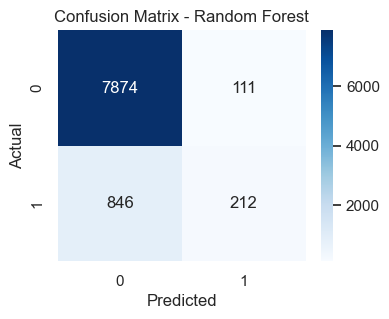

In [73]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title(f"Confusion Matrix - {model_name}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [74]:
 # Classification report (optional, more details)

In [76]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7985
           1       0.66      0.20      0.31      1058

    accuracy                           0.89      9043
   macro avg       0.78      0.59      0.62      9043
weighted avg       0.87      0.89      0.87      9043



##  MODEL COMPARISON TABLE

In [78]:
results_df = pd.DataFrame(results)
print("Model Comparison:")
display(results_df.sort_values(by="ROC-AUC", ascending=False))

Model Comparison:


,Model,Accuracy,Precision,Recall,F1-score,ROC-AUC
0,Random Forest,0.894172,0.656347,0.200378,0.307024,0.795863


## CHOOSE BEST MODEL (BASED ON ROC-AUC)

In [79]:
best_model_name = results_df.sort_values(by="ROC-AUC", ascending=False).iloc[0]['Model']
print(f"The best model based on ROC-AUC is: {best_model_name}")

best_model = models[best_model_name]

The best model based on ROC-AUC is: Random Forest


## FEATURE IMPORTANCE (FOR TREE-BASED MODELS)

In [80]:
# We only show feature importance for models that support it

Top 20 important features for Random Forest:


,Feature,Importance
1,balance,0.169581
0,age,0.145155
2,day,0.127349
3,campaign,0.069422
4,pdays,0.043634
39,poutcome_success,0.040393
26,contact_unknown,0.038003
23,housing_yes,0.031875
5,previous,0.023133
19,education_secondary,0.018509


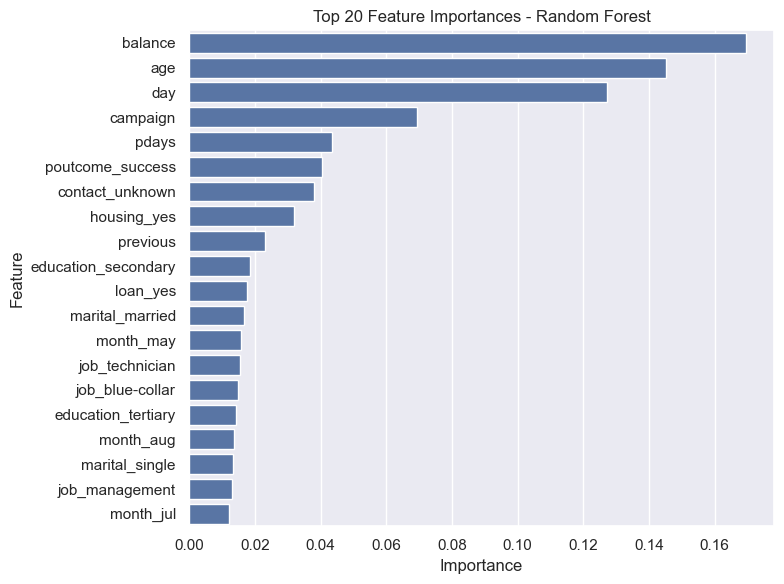

In [81]:
if hasattr(best_model, "feature_importances_"):
    importances = best_model.feature_importances_
    feature_names = X_encoded.columns
    
    feat_imp = pd.DataFrame({
        "Feature": feature_names,
        "Importance": importances
    })
    
    feat_imp = feat_imp.sort_values(by="Importance", ascending=False).head(20)
    
    print(f"Top 20 important features for {best_model_name}:")
    display(feat_imp)
    
    plt.figure(figsize=(8, 6))
    sns.barplot(x="Importance", y="Feature", data=feat_imp)
    plt.title(f"Top 20 Feature Importances - {best_model_name}")
    plt.tight_layout()
    plt.show()
else:
    print(f"{best_model_name} does not support feature importances.")

## SIMPLE MARKETING INSIGHTS FROM DATA

In [82]:
# Customer segments more likely to subscribe

In [83]:
print("Subscription rate (%) by marital status:")
marital_y = pd.crosstab(data['marital'], data['y'], normalize='index') * 100
display(marital_y.sort_values(by='yes', ascending=False))

print("\nSubscription rate (%) by education level:")
education_y = pd.crosstab(data['education'], data['y'], normalize='index') * 100
display(education_y.sort_values(by='yes', ascending=False))

print("\nSubscription rate (%) by contact type:")
contact_y = pd.crosstab(data['contact'], data['y'], normalize='index') * 100
display(contact_y.sort_values(by='yes', ascending=False))

print("\nSubscription rate (%) by outcome of previous campaign:")
poutcome_y = pd.crosstab(data['poutcome'], data['y'], normalize='index') * 100
display(poutcome_y.sort_values(by='yes', ascending=False))

Subscription rate (%) by marital status:


y,no,yes
marital,,
single,85.050821,14.949179
divorced,88.054542,11.945458
married,89.876534,10.123466



Subscription rate (%) by education level:


y,no,yes
education,,
tertiary,84.993610,15.006390
unknown,86.429725,13.570275
secondary,89.440565,10.559435
primary,91.373522,8.626478



Subscription rate (%) by contact type:


y,no,yes
contact,,
cellular,85.081100,14.918900
telephone,86.579491,13.420509
unknown,95.929339,4.070661



Subscription rate (%) by outcome of previous campaign:


y,no,yes
poutcome,,
success,35.274653,64.725347
other,83.315217,16.684783
failure,87.390329,12.609671
unknown,90.838497,9.161503
